In [1]:
import requests

import pandas as pd

import json

import datetime

In [2]:
# API Key for OpenWeatherMap

API_KEY = "2a455efa0ce15bc7aae54cf089436d8f"



# fetching weather data using Latitude and longitude

# Set the location for which you want to retrieve weather data
lat = 18.184135
lon = 74.610764

# using the following GET request to fetch weather data
response = requests.get(f"http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={API_KEY}").json()


In [3]:
# Basic exploration

response.keys()
response['list'][0]
len(response['list'])
response["list"][0]["weather"][0]["description"]


'scattered clouds'

In [4]:
# Creating Series using arrays and using those series creating a Dataframe

temperatures = [item['main']['temp'] for item in response['list']]      #it will extract all values (40) and putting into one variable
timestamps = [pd.to_datetime(item['dt'], unit='s') for item in response['list']]
temperature = [item['main']['temp'] for item in response['list']]
humidity = [item['main']['humidity'] for item in response['list']]
wind_speed = [item['wind']['speed'] for item in response['list']]
weather_description = [item['weather'][0]['description'] for item in response['list']]

# Create a pandas DataFrame with the extracted weather data
weather_df = pd.DataFrame({
    'Timestamp': timestamps,
    'Temperature': temperatures,
    'humidity': humidity,
    'wind_speed': wind_speed,
    'weather_description': weather_description,
})

# Set the Timestamp column as the DataFrame's index
weather_df.set_index('Timestamp', inplace=True)


In [5]:
# Pre-processing the weather data

# Clean and preprocess the data

# Handling missing values
weather_df.fillna(0, inplace=True)  # Replace missing values with 0 or appropriate value

# Handling inconsistent format (if applicable)
weather_df['Temperature'] = weather_df['Temperature'].apply(lambda x: x - 273.15 if isinstance(x, float) else x)   # Convert temperature from Kelvin to Celsius

# Print the cleaned and preprocessed data
print(weather_df)


                     Temperature  humidity  wind_speed weather_description
Timestamp                                                                 
2023-11-19 06:00:00        29.39        42        3.92    scattered clouds
2023-11-19 09:00:00        30.00        39        3.30    scattered clouds
2023-11-19 12:00:00        29.30        40        3.31    scattered clouds
2023-11-19 15:00:00        26.59        45        3.98    scattered clouds
2023-11-19 18:00:00        25.90        46        2.80    scattered clouds
2023-11-19 21:00:00        24.29        51        3.44     overcast clouds
2023-11-20 00:00:00        21.73        61        2.76       broken clouds
2023-11-20 03:00:00        24.45        58        4.39       broken clouds
2023-11-20 06:00:00        29.11        42        3.95       broken clouds
2023-11-20 09:00:00        30.96        34        2.90          few clouds
2023-11-20 12:00:00        29.33        38        2.33           clear sky
2023-11-20 15:00:00      

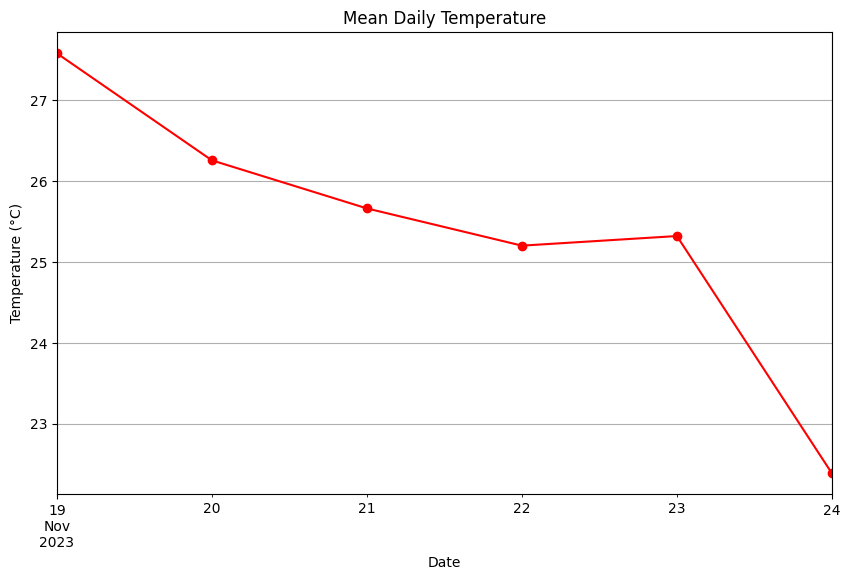

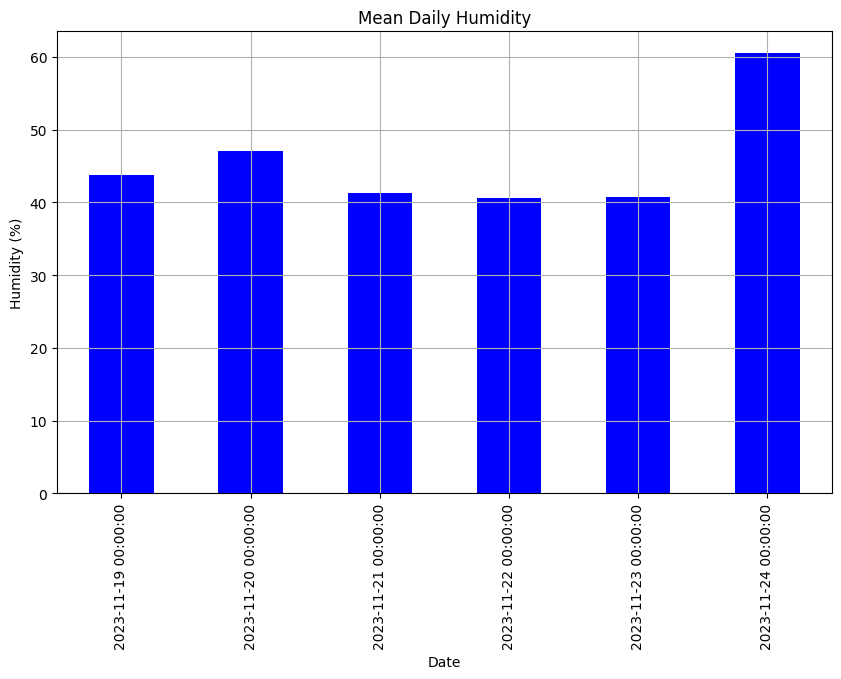

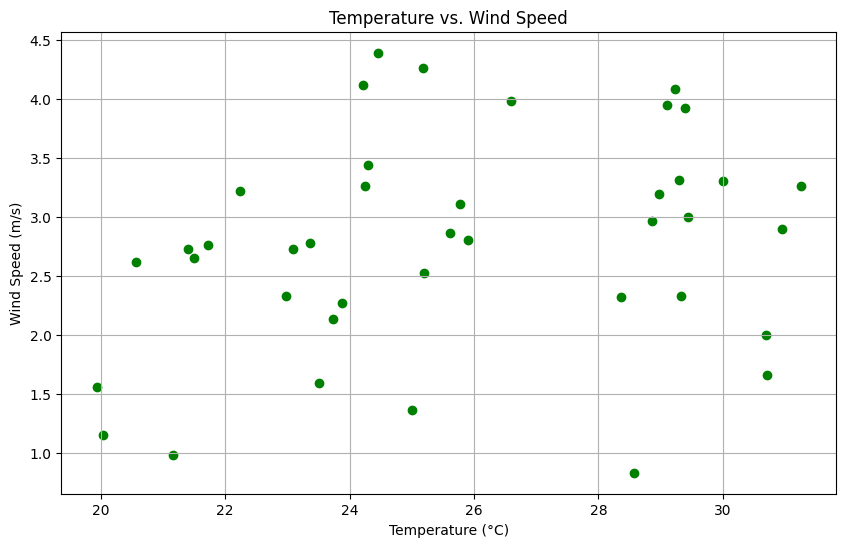

In [7]:
# Plotting

import matplotlib.pyplot as plt

daily_mean_temp = weather_df['Temperature'].resample('D').mean()
daily_mean_humidity = weather_df['humidity'].resample('D').mean()
daily_mean_wind_speed = weather_df['wind_speed'].resample('D').mean()

# Plot the mean daily temperature over time (Line plot)
plt.figure(figsize=(10, 6))
daily_mean_temp.plot(color='red', linestyle='-', marker='o')
plt.title('Mean Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

# Plot the mean daily humidity over time (Bar plot)
plt.figure(figsize=(10, 6))
daily_mean_humidity.plot(kind='bar', color='blue')
plt.title('Mean Daily Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

# Plot the relationship between temperature and wind speed (Scatter plot)
plt.figure(figsize=(10, 6))
plt.scatter(weather_df['Temperature'], weather_df['wind_speed'], color='green')
plt.title('Temperature vs. Wind Speed')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()